In [63]:
import pandas as pd ### para manejo de datos
import sqlite3 as sql

import func_mod as funciones  ###archivo de funciones propias
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt ### gráficos
from sklearn.model_selection import RandomizedSearchCV
import joblib  ### para guardar modelos
from sklearn.preprocessing import StandardScaler ## escalar variables 
import openpyxl

In [36]:
base = pd.read_excel(r'C:\Users\alejo\OneDrive\Documentos\Analítica-3\Repos\Recursos_humanos_git\Proyecto-Analitica-3\data\base_modelo_final.xlsx')
base

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,InfoDate,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,retirementDate,retirementType,resignationReason,Attrition
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,...,2015-12-31,3,3,3.0,4.0,2.0,NaT,NaN,NaN,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,...,2015-12-31,2,4,3.0,2.0,4.0,2016-10-15,Resignation,Others,1
2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,...,2015-12-31,3,3,2.0,2.0,1.0,NaT,NaN,NaN,0
3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,...,2015-12-31,2,3,4.0,4.0,3.0,NaT,NaN,NaN,0
4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,...,2015-12-31,3,3,4.0,1.0,3.0,NaT,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,...,2015-12-31,3,3,4.0,1.0,3.0,NaT,NaN,NaN,0
4406,29,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,...,2015-12-31,2,3,4.0,4.0,3.0,NaT,NaN,NaN,0
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,...,2015-12-31,3,4,1.0,3.0,3.0,NaT,NaN,NaN,0
4408,42,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,...,2015-12-31,2,3,4.0,1.0,3.0,NaT,NaN,NaN,0


In [37]:
base.drop('retirementDate', axis=1, inplace=True)
base.drop('retirementType', axis=1, inplace=True)
base.drop('resignationReason', axis=1, inplace=True)
base.drop('Over18', axis=1, inplace=True)
base.drop('InfoDate', axis=1, inplace=True)

In [38]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeID               4410 non-null   int64  
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [39]:
df2=base.dropna(axis=0) ### si se pone 1 se borra la columna con na si se pone 0, o se deja vacío, se borra la fila
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   BusinessTravel           4300 non-null   object 
 2   Department               4300 non-null   object 
 3   DistanceFromHome         4300 non-null   int64  
 4   Education                4300 non-null   int64  
 5   EducationField           4300 non-null   object 
 6   EmployeeID               4300 non-null   int64  
 7   Gender                   4300 non-null   object 
 8   JobLevel                 4300 non-null   int64  
 9   JobRole                  4300 non-null   object 
 10  MaritalStatus            4300 non-null   object 
 11  MonthlyIncome            4300 non-null   int64  
 12  NumCompaniesWorked       4300 non-null   float64
 13  PercentSalaryHike        4300 non-null   int64  
 14  StockOptionLevel         4300

In [53]:
df2['TrainingTimesLastYear'].value_counts()

TrainingTimesLastYear
2    1596
3    1439
4     359
5     346
1     209
6     190
0     161
Name: count, dtype: int64

In [54]:
list_dummies=['BusinessTravel', 'Department','EducationField','Gender', 'JobRole', 'MaritalStatus']


df_dummies=pd.get_dummies(df2,columns=list_dummies)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4300 non-null   int64  
 1   DistanceFromHome                   4300 non-null   int64  
 2   Education                          4300 non-null   int64  
 3   EmployeeID                         4300 non-null   int64  
 4   JobLevel                           4300 non-null   int64  
 5   MonthlyIncome                      4300 non-null   int64  
 6   NumCompaniesWorked                 4300 non-null   float64
 7   PercentSalaryHike                  4300 non-null   int64  
 8   StockOptionLevel                   4300 non-null   int64  
 9   TotalWorkingYears                  4300 non-null   float64
 10  TrainingTimesLastYear              4300 non-null   int64  
 11  YearsAtCompany                     4300 non-null   int64  
 1

In [55]:
y=df_dummies.Attrition
X1= df_dummies.loc[:,~df_dummies.columns.isin(['Attrition','EmployeeID'])]

In [56]:
scaler=StandardScaler()
scaler.fit(X1)
X2=scaler.transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)

In [61]:
m_lreg = LogisticRegression()
m_dtree = DecisionTreeClassifier()
m_rf = RandomForestClassifier()
m_gbt = GradientBoostingClassifier()

modelos = [m_lreg, m_dtree, m_rf, m_gbt]

In [62]:
var_names=funciones.sel_variables(modelos,X,y,threshold="2.5*mean")
var_names.shape

(10,)

In [74]:
var_names

array(['Age', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [81]:
scoring = 'average_precision'  # AUCPR se calcula usando average_precision
AUCPR_df = funciones.medir_modelos(modelos, scoring, X, y, 5)
AUCPR_varsel = funciones.medir_modelos(modelos, scoring, X2, y, 5)

In [82]:
Aucpr = pd.concat([AUCPR_df, AUCPR_varsel], axis=1)
Aucpr.columns = ['rl', 'dt', 'rf', 'gb',
                'rl_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']

<Axes: title={'center': 'Comparación de modelos con todas las variables y seleccionadas (AUCPR)'}>

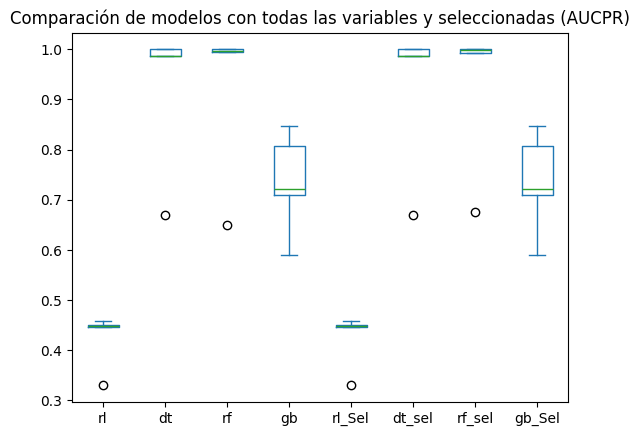

In [83]:
Aucpr.plot(kind='box', title="Comparación de modelos con todas las variables y seleccionadas (AUCPR)")

In [84]:
Aucpr.mean()

rl        0.425974
dt        0.928562
rf        0.928223
gb        0.734870
rl_Sel    0.425974
dt_sel    0.928562
rf_sel    0.933739
gb_Sel    0.734870
dtype: float64

In [85]:
Aucpr

,rl,dt,rf,gb,rl_Sel,dt_sel,rf_sel,gb_Sel
0,0.450221,1.000000,1.000000,0.806837,0.450221,1.000000,1.000000,0.806837
1,0.447937,0.986578,0.995657,0.721365,0.447937,0.986578,0.999522,0.721365
2,0.457524,1.000000,1.000000,0.846553,0.457524,1.000000,1.000000,0.846553
3,0.444948,0.986578,0.995949,0.709208,0.444948,0.986578,0.993394,0.709208
4,0.329241,0.669654,0.649507,0.590386,0.329241,0.669654,0.675777,0.590386
